## **Solar Power Output Prediction using Linear Regression Model**

**WEEK 1 DATA PREPROCESSING**

**IMPORTING NECESSARY LIBRARIES**

In [61]:
#import required libraries
import pandas as pd      #df manipulation
import numpy as np       #numerical operations 
import seaborn as sns    #visualization 
import matplotlib.pyplot as plt #visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #Standardisation and normalization

**LOADING DATASET AND DATA ACCESSING**

In [62]:
#load the dfset
df = pd.read_csv("D:\\Edunet Internship\\solarpoweropDataset.csv")


In [63]:
#display the first few rows of dfset 
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [64]:
#display the last few rows of dfset 
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [65]:
#to check the total number of rows and columns'
df.shape

(4213, 21)

In [66]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

**DATA CLEANING**

In [67]:
#check for missing values
df.isnull()
#tocheck totally
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [68]:
#to check dulicate values
df.duplicated().sum()

0

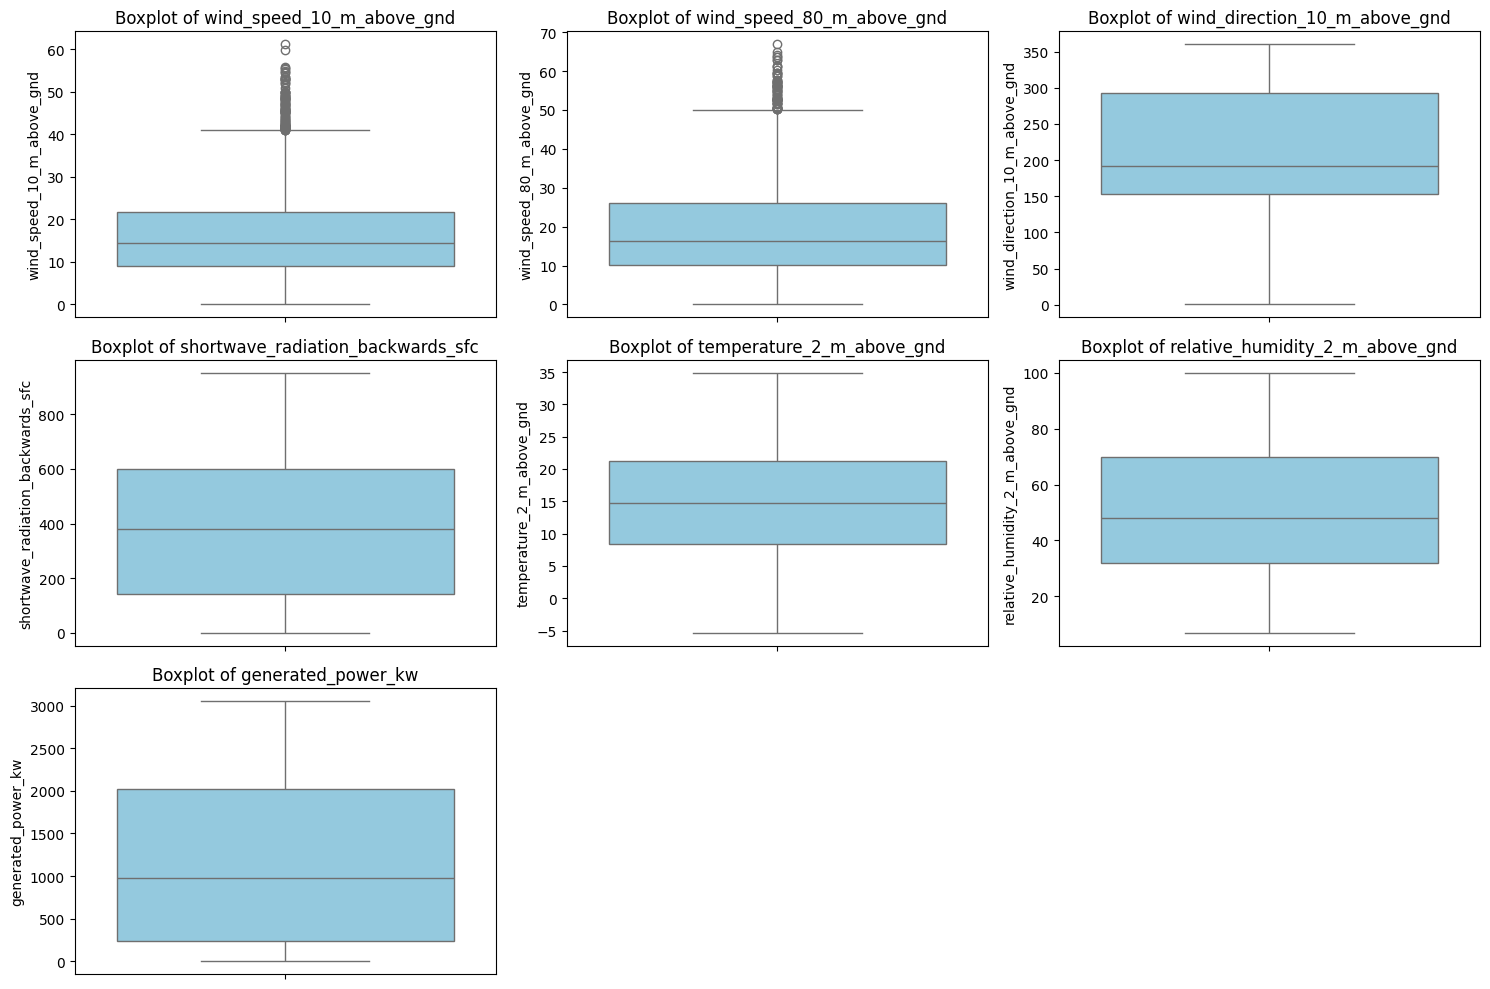

{'wind_speed_10_m_above_gnd': {'Q1': 9.01,
  'Q3': 21.84,
  'IQR': 12.83,
  'Lower Bound': -10.235000000000001,
  'Upper Bound': 41.085,
  'Number of Outliers': 101},
 'wind_speed_80_m_above_gnd': {'Q1': 10.14,
  'Q3': 26.14,
  'IQR': 16.0,
  'Lower Bound': -13.86,
  'Upper Bound': 50.14,
  'Number of Outliers': 74},
 'wind_direction_10_m_above_gnd': {'Q1': 153.19,
  'Q3': 292.07,
  'IQR': 138.88,
  'Lower Bound': -55.129999999999995,
  'Upper Bound': 500.39,
  'Number of Outliers': 0},
 'shortwave_radiation_backwards_sfc': {'Q1': 142.4,
  'Q3': 599.86,
  'IQR': 457.46000000000004,
  'Lower Bound': -543.7900000000001,
  'Upper Bound': 1286.0500000000002,
  'Number of Outliers': 0},
 'temperature_2_m_above_gnd': {'Q1': 8.39,
  'Q3': 21.29,
  'IQR': 12.899999999999999,
  'Lower Bound': -10.959999999999997,
  'Upper Bound': 40.64,
  'Number of Outliers': 0},
 'relative_humidity_2_m_above_gnd': {'Q1': 32.0,
  'Q3': 70.0,
  'IQR': 38.0,
  'Lower Bound': -25.0,
  'Upper Bound': 127.0,
  'Num

In [69]:
#outlier Analysis
# Function to detect and visualize outliers using boxplots
def outlier_analysis(df, variables):
    outlier_stats = {}
    plt.figure(figsize=(15, 10))
    
    for i, var in enumerate(variables, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, y=var, color='skyblue')
        plt.title(f'Boxplot of {var}')
        
        # Detect outliers using the IQR method
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        
        outlier_stats[var] = {
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'Lower Bound': lower_bound, 'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers)
        }
    
    plt.tight_layout()
    plt.show()
    return outlier_stats

# Variables to analyze for outliers
variables_to_analyze = [
    'wind_speed_10_m_above_gnd',
    'wind_speed_80_m_above_gnd',
    'wind_direction_10_m_above_gnd',
    'shortwave_radiation_backwards_sfc',
    'temperature_2_m_above_gnd',
    'relative_humidity_2_m_above_gnd',
    'generated_power_kw'
]

# Perform outlier analysis
outlier_statistics = outlier_analysis(df, variables_to_analyze)
outlier_statistics


**DATA STATISTICS**

In [70]:
#display descriptive statistics summary
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [71]:
#check the information of the dfset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

**EXPLORATORY DATA ANALYSIS**

C:\Users\Monasri M\AppData\Local\Temp\ipykernel_17036\3126173229.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_avg_power = df.groupby('wind_speed_10_m_above_gnd_bin')['generated_power_kw'].mean()
C:\Users\Monasri M\AppData\Local\Temp\ipykernel_17036\3126173229.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_dir_avg_power = df.groupby('wind_direction_10_m_above_gnd_bin')['generated_power_kw'].mean()
C:\Users\Monasri M\AppData\Local\Temp\ipykernel_17036\3126173229.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

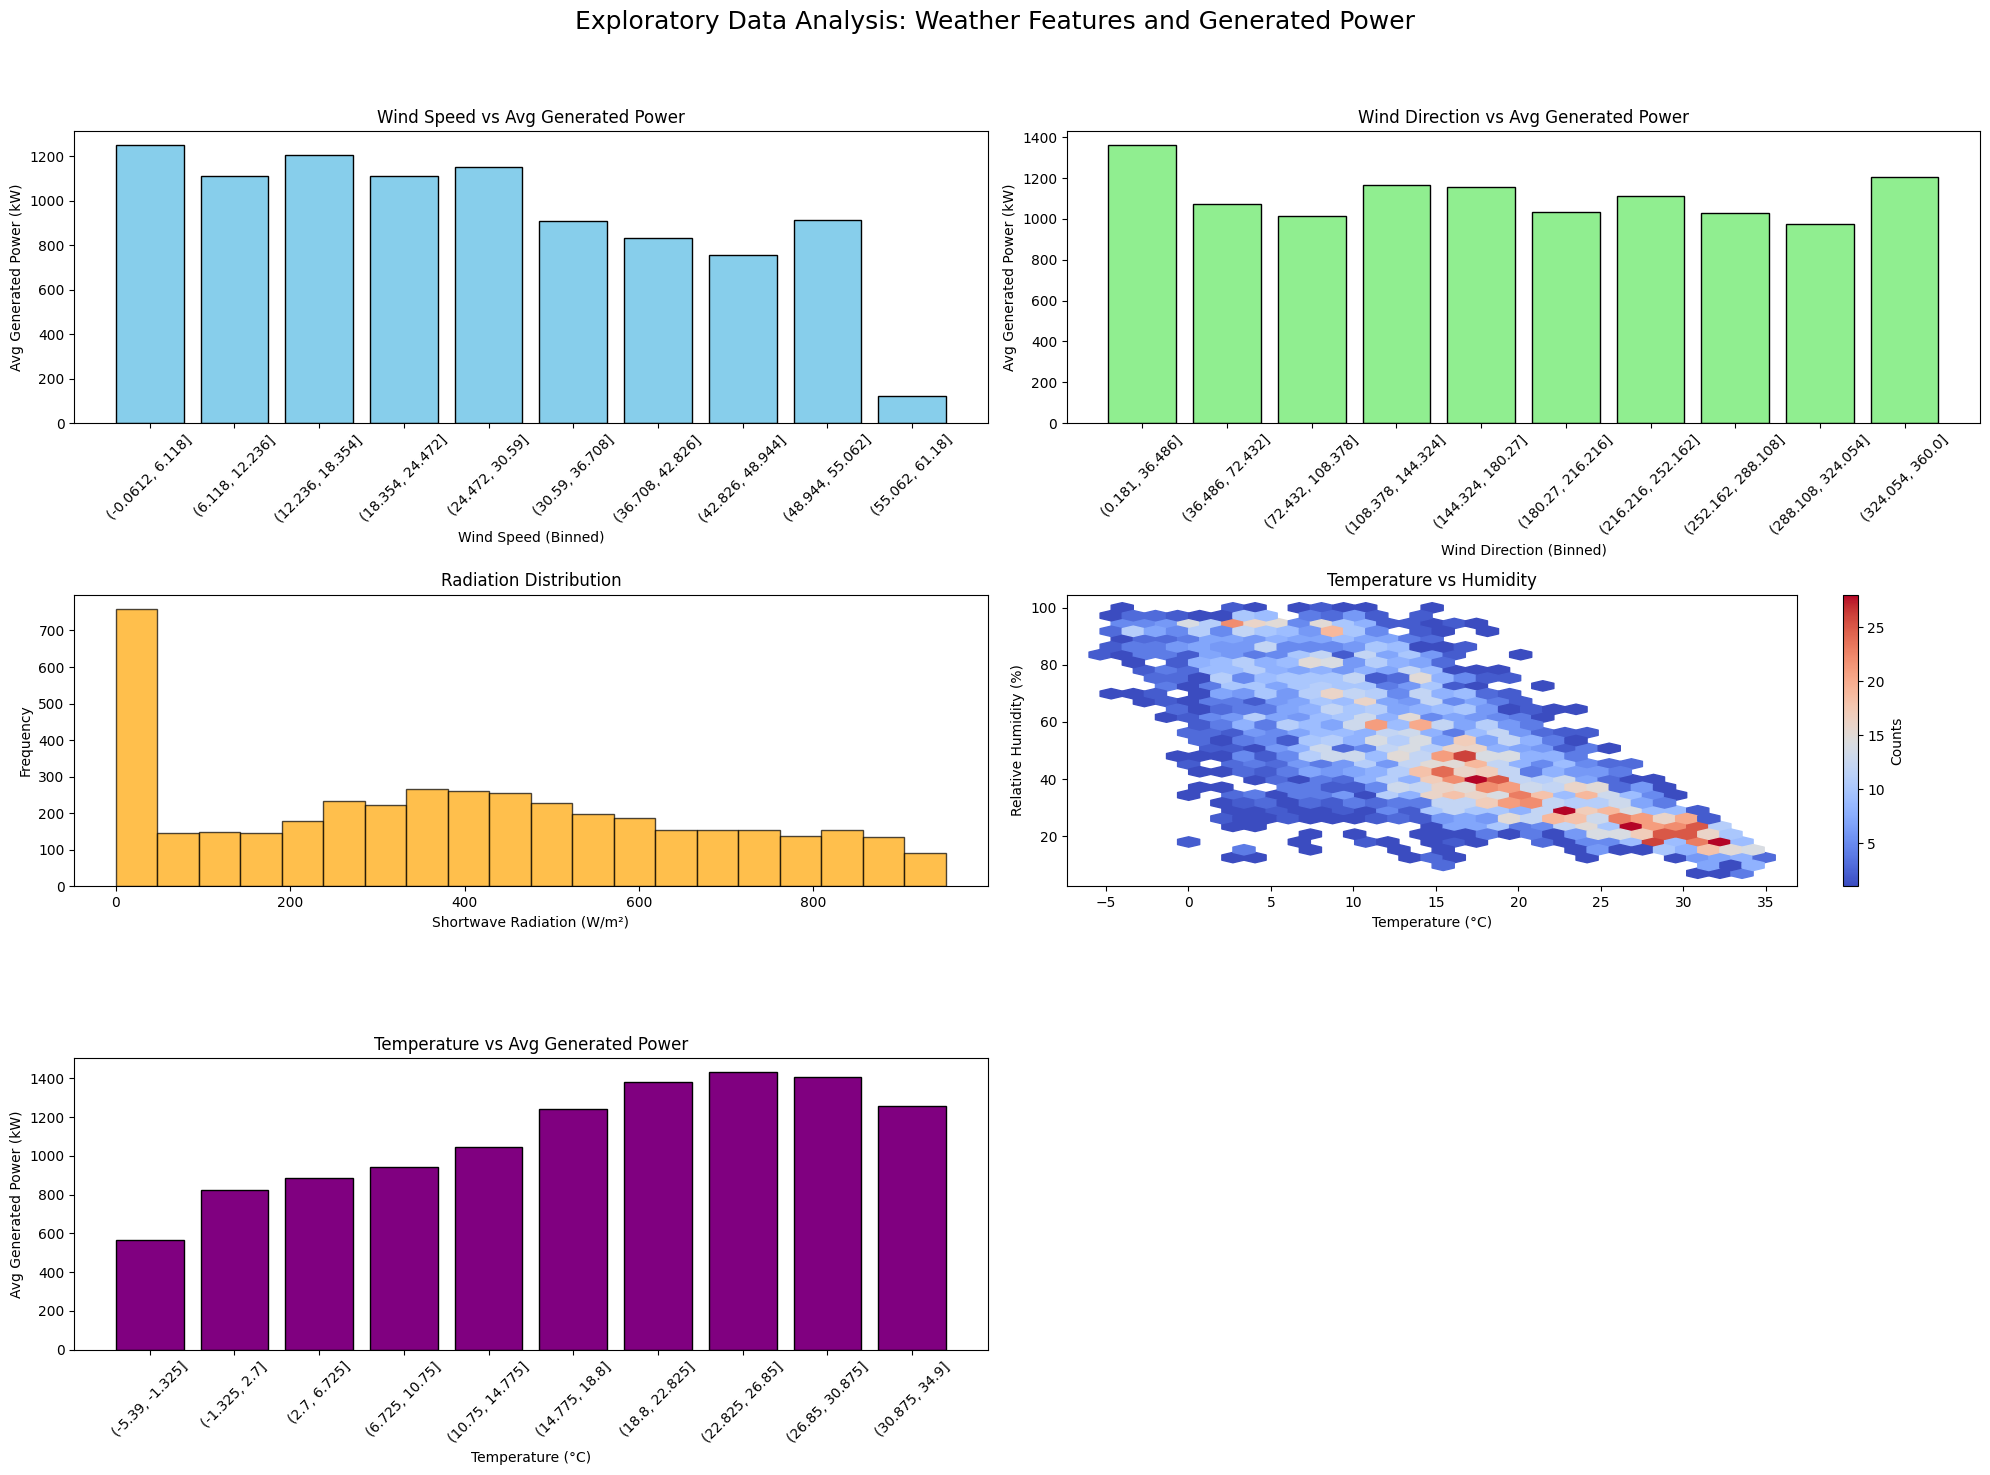

In [72]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Exploratory Data Analysis: Weather Features and Generated Power', fontsize=18)

# Subplot 1: Wind Speed vs Average Generated Power (Bar Plot)
df['wind_speed_10_m_above_gnd_bin'] = pd.cut(df['wind_speed_10_m_above_gnd'], bins=10)
wind_speed_avg_power = df.groupby('wind_speed_10_m_above_gnd_bin')['generated_power_kw'].mean()
axes[0, 0].bar(wind_speed_avg_power.index.astype(str), wind_speed_avg_power, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Wind Speed vs Avg Generated Power')
axes[0, 0].set_xlabel('Wind Speed (Binned)')
axes[0, 0].set_ylabel('Avg Generated Power (kW)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Wind Direction vs Average Generated Power (Bar Plot)
df['wind_direction_10_m_above_gnd_bin'] = pd.cut(df['wind_direction_10_m_above_gnd'], bins=10)
wind_dir_avg_power = df.groupby('wind_direction_10_m_above_gnd_bin')['generated_power_kw'].mean()
axes[0, 1].bar(wind_dir_avg_power.index.astype(str), wind_dir_avg_power, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Wind Direction vs Avg Generated Power')
axes[0, 1].set_xlabel('Wind Direction (Binned)')
axes[0, 1].set_ylabel('Avg Generated Power (kW)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Radiation Distribution (Histogram)
axes[1, 0].hist(df['shortwave_radiation_backwards_sfc'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Radiation Distribution')
axes[1, 0].set_xlabel('Shortwave Radiation (W/m²)')
axes[1, 0].set_ylabel('Frequency')

# Subplot 4: Temperature vs Humidity (Hexbin)
hb = axes[1, 1].hexbin(df['temperature_2_m_above_gnd'], df['relative_humidity_2_m_above_gnd'], gridsize=30, cmap='coolwarm', mincnt=1)
axes[1, 1].set_title('Temperature vs Humidity')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Relative Humidity (%)')
fig.colorbar(hb, ax=axes[1, 1], label='Counts')

# Subplot 5: Temperature vs Avg Generated Power (Bar Plot)
df['temperature_2_m_above_gnd_bin'] = pd.cut(df['temperature_2_m_above_gnd'], bins=10)
temp_avg_power = df.groupby('temperature_2_m_above_gnd_bin')['generated_power_kw'].mean()
axes[2, 0].bar(temp_avg_power.index.astype(str), temp_avg_power, color='purple', edgecolor='black')
axes[2, 0].set_title('Temperature vs Avg Generated Power')
axes[2, 0].set_xlabel('Temperature (°C)')
axes[2, 0].set_ylabel('Avg Generated Power (kW)')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**STANDARDISATION AND NORMALIZATION**

In [73]:
#standardisation
# List of columns that need to be standardized (real-world unit-based variables)
columns_to_standardize = [
    'temperature_2_m_above_gnd',
    'relative_humidity_2_m_above_gnd',
    'mean_sea_level_pressure_MSL',
    'total_precipitation_sfc',
    'snowfall_amount_sfc',
    'total_cloud_cover_sfc',
    'high_cloud_cover_high_cld_lay',
    'medium_cloud_cover_mid_cld_lay',
    'low_cloud_cover_low_cld_lay',
    'shortwave_radiation_backwards_sfc',
    'wind_speed_10_m_above_gnd',
    'wind_direction_10_m_above_gnd',
    'wind_speed_80_m_above_gnd',
    'wind_direction_80_m_above_gnd',
    'wind_speed_900_mb',
    'wind_direction_900_mb',
    'wind_gust_10_m_above_gnd',
    'angle_of_incidence',
    'zenith',
    'azimuth'
]

# Step 1: Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Apply Standardization (Z-score)
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Step 3: Check the first few rows to see the result
print(df.head())


   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                  -1.456981                        -0.865577   
1                  -1.441167                        -1.035623   
2                  -1.289799                        -0.780554   
3                  -1.044674                        -0.908088   
4                  -0.828919                        -1.035623   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                     2.230435                -0.186606            -0.073874   
1                     2.244676                -0.186606            -0.073874   
2                     2.287398                -0.186606            -0.073874   
3                     2.287398                -0.186606            -0.073874   
4                     2.144990                -0.186606            -0.073874   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0              -0.795008                      -0.470848   
1         

In [74]:
#Normalization
# Column to normalize (generated_power_kw - assuming it's the target variable)
target_column = 'generated_power_kw'

# Initialize the MinMaxScaler
normalizer = MinMaxScaler()

# Apply normalization to the target variable
df[target_column] = normalizer.fit_transform(df[[target_column]])

# Check the first few rows to see the result
print(df['generated_power_kw'].head())

0    0.148554
1    0.461922
2    0.724566
3    0.826882
4    0.863716
Name: generated_power_kw, dtype: float64
